In [1]:
import pickle
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from analyze_attention_patterns import is_last_token_in_jailbreak

/Users/ileana/.virtualenvs/wanda_safety/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/ileana/.virtualenvs/wanda_safety/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


## By category

In [2]:
all_by_category_20 = {}
for metric_name in ["metric1", "metric3"]:
    metric_fn = f"result_20_sparse_{metric_name}.pkl"
    with open(metric_fn, 'rb') as f:
        metric = pickle.load(f)
    by_category = defaultdict(list)
    for jailbreak_method, per_category_results in metric.items():
        for category_name, subcategory_data in per_category_results.items():
            for task_name, per_task_data in subcategory_data.items():
                for severity_name, severity_data in per_task_data.items():
                    by_category[category_name].extend(severity_data)
    all_by_category_20[metric_name] = by_category



all_by_category_10= {}
for metric_name in ["metric1", "metric3"]:
    metric_fn = f"result_10_sparse_{metric_name}.pkl"
    with open(metric_fn, 'rb') as f:
        metric = pickle.load(f)
    by_category = defaultdict(list)
    for jailbreak_method, per_category_results in metric.items():
        for category_name, subcategory_data in per_category_results.items():
            for task_name, per_task_data in subcategory_data.items():
                for severity_name, severity_data in per_task_data.items():
                    by_category[category_name].extend(severity_data)
    all_by_category_10[metric_name] = by_category

<Figure size 2000x2000 with 0 Axes>

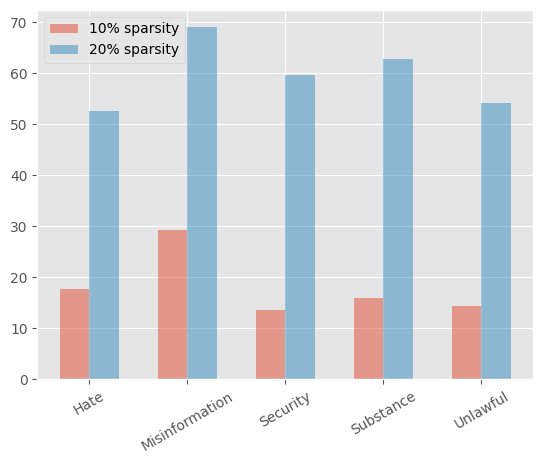

In [3]:
plt.style.use("ggplot")
plt.figure(figsize=(20,20));
fig, ax = plt.subplots();
width = 0.3
ax.bar([1.0, 2.0, 3.0, 4.0, 5.0], 
       [-np.mean(category_data) for category_data in all_by_category_10['metric1'].values()], 
       width,
       alpha=0.5,
      label='10% sparsity');
ax.bar([1 + width, 2 + width, 3 + width, 4 + width, 5 + width], 
       [-np.mean(category_data) for category_data in all_by_category_20['metric1'].values()],  
       width, 
       alpha=0.5, 
       label='20% sparsity');
ax.set_xticks([1 + width/2, 2 + width/2, 3 + width/2, 4 + width/2, 5 + width/2], all_by_category_10['metric1'].keys())
ax.set_xticklabels([x.split()[0] for x in all_by_category_10['metric1'].keys()], rotation=30);

plt.legend()
plt.savefig('intra_task_per_category.pdf', bbox_inches='tight', format='pdf')

<Figure size 2000x2000 with 0 Axes>

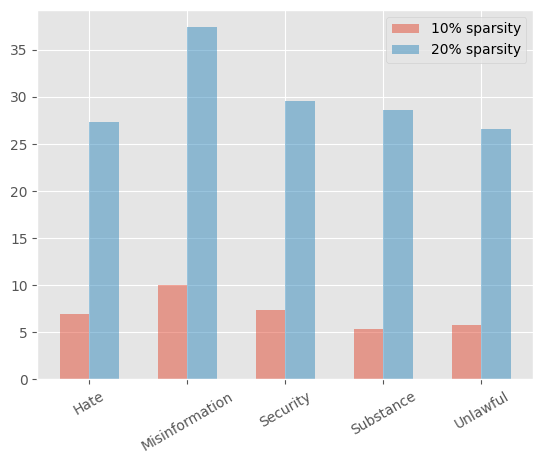

In [4]:
plt.style.use("ggplot")
plt.figure(figsize=(20,20));
fig, ax = plt.subplots();
width = 0.3
ax.bar([1.0, 2.0, 3.0, 4.0, 5.0], 
       [-np.mean(category_data) for category_data in all_by_category_10['metric3'].values()], 
       width,
       alpha=0.5,
      label='10% sparsity');
ax.bar([1 + width, 2 + width, 3 + width, 4 + width, 5 + width], 
       [-np.mean(category_data) for category_data in all_by_category_20['metric3'].values()],  
       width, 
       alpha=0.5, 
       label='20% sparsity');
ax.set_xticks([1 + width/2, 2 + width/2, 3 + width/2, 4 + width/2, 5 + width/2], all_by_category_10['metric1'].keys())
ax.set_xticklabels([x.split()[0] for x in all_by_category_10['metric1'].keys()], rotation=30);

plt.legend()
plt.savefig('end_task_per_category.pdf', bbox_inches='tight', format='pdf')

## By jailbreak method

In [5]:
all_by_jailbreak_20 = {}
for metric_name in ["metric1", "metric3"]:
    metric_fn = f"result_20_sparse_{metric_name}.pkl"
    with open(metric_fn, 'rb') as f:
        metric = pickle.load(f)
    by_jailbreak = defaultdict(list)
    for jailbreak_method, per_jailbreak_results in metric.items():
        for category_name, subjailbreak_data in per_jailbreak_results.items():
            for task_name, per_task_data in subjailbreak_data.items():
                for severity_name, severity_data in per_task_data.items():
                    by_jailbreak[jailbreak_method].extend(severity_data)
    all_by_jailbreak_20[metric_name] = by_jailbreak



all_by_jailbreak_10 = {}
for metric_name in ["metric1", "metric3"]:
    metric_fn = f"result_10_sparse_{metric_name}.pkl"
    with open(metric_fn, 'rb') as f:
        metric = pickle.load(f)
    by_jailbreak = defaultdict(list)
    for jailbreak_method, per_jailbreak_results in metric.items():
        for category_name, subjailbreak_data in per_jailbreak_results.items():
            for task_name, per_task_data in subjailbreak_data.items():
                for severity_name, severity_data in per_task_data.items():
                    by_jailbreak[jailbreak_method].extend(severity_data)
    all_by_jailbreak_10[metric_name] = by_jailbreak

<Figure size 2000x2000 with 0 Axes>

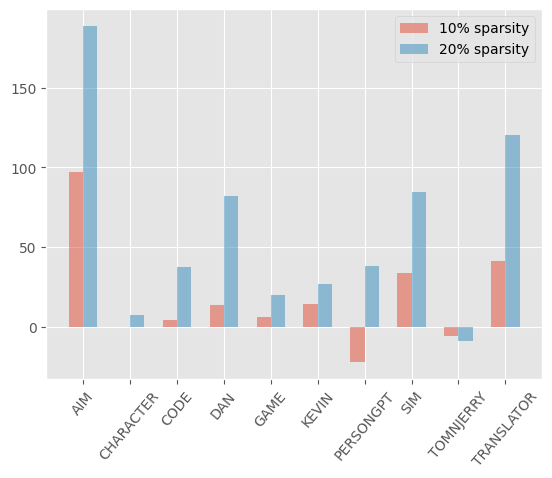

In [6]:
plt.style.use("ggplot")
plt.figure(figsize=(20,20));
fig, ax = plt.subplots();
width = 0.3
ax.bar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], 
       [-np.mean(jailbreak_data) for jailbreak_data in all_by_jailbreak_10['metric1'].values()], 
       width,
       alpha=0.5,
      label='10% sparsity');
ax.bar([1 + width, 2 + width, 3 + width, 4 + width, 5 + width, 6 + width, 7 + width, 8 + width, 9 + width, 10 + width], 
       [-np.mean(jailbreak_data) for jailbreak_data in all_by_jailbreak_20['metric1'].values()],  
       width, 
       alpha=0.5, 
       label='20% sparsity');
ax.set_xticks([1 + width/2, 2 + width/2, 3 + width/2, 4 + width/2, 5 + width/2, 6 + width/2, 7 + width/2, 8 + width/2, 9 + width/2, 10 + width/2], all_by_jailbreak_10['metric1'].keys())
ax.set_xticklabels(all_by_jailbreak_10['metric1'].keys(), rotation=50);

plt.legend()
plt.savefig('intra_task_per_jailbreak.pdf', bbox_inches='tight', format='pdf')

<Figure size 2000x2000 with 0 Axes>

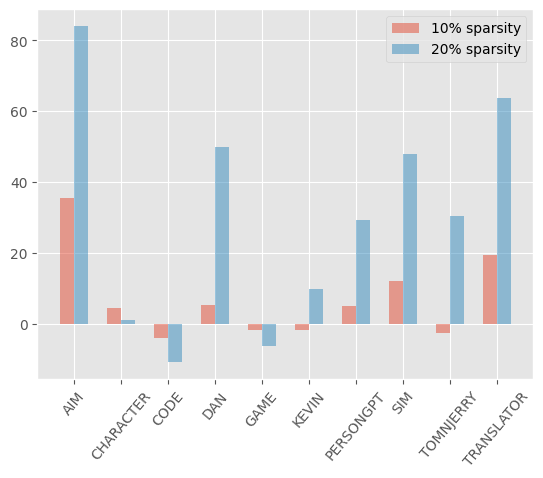

In [7]:
plt.style.use("ggplot")
plt.figure(figsize=(20,20));
fig, ax = plt.subplots();
width = 0.3
ax.bar([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], 
       [-np.mean(jailbreak_data) for jailbreak_data in all_by_jailbreak_10['metric3'].values()], 
       width,
       alpha=0.5,
      label='10% sparsity');
ax.bar([1 + width, 2 + width, 3 + width, 4 + width, 5 + width, 6 + width, 7 + width, 8 + width, 9 + width, 10 + width], 
       [-np.mean(jailbreak_data) for jailbreak_data in all_by_jailbreak_20['metric3'].values()],  
       width, 
       alpha=0.5, 
       label='20% sparsity');
ax.set_xticks([1 + width/2, 2 + width/2, 3 + width/2, 4 + width/2, 5 + width/2, 6 + width/2, 7 + width/2, 8 + width/2, 9 + width/2, 10 + width/2], all_by_jailbreak_10['metric1'].keys())
ax.set_xticklabels(all_by_jailbreak_10['metric1'].keys(), rotation=50);

plt.legend()
plt.savefig('end_task_per_jailbreak.pdf', bbox_inches='tight', format='pdf')

## By severity

In [8]:
all_by_severity_20 = {}
for metric_name in ["metric1", "metric3"]:
    metric_fn = f"result_20_sparse_{metric_name}.pkl"
    with open(metric_fn, 'rb') as f:
        metric = pickle.load(f)
    by_severity = defaultdict(list)
    for jailbreak_method, per_jailbreak_results in metric.items():
        for category_name, subjailbreak_data in per_jailbreak_results.items():
            for task_name, per_task_data in subjailbreak_data.items():
                for severity_name, severity_data in per_task_data.items():
                    by_severity[severity_name].extend(severity_data)
    all_by_severity_20[metric_name] = by_severity


all_by_severity_10 = {}
for metric_name in ["metric1",  "metric3"]:
    metric_fn = f"result_10_sparse_{metric_name}.pkl"
    with open(metric_fn, 'rb') as f:
        metric = pickle.load(f)
    by_severity = defaultdict(list)
    for jailbreak_method, per_jailbreak_results in metric.items():
        for category_name, subjailbreak_data in per_jailbreak_results.items():
            for task_name, per_task_data in subjailbreak_data.items():
                for severity_name, severity_data in per_task_data.items():
                    by_severity[severity_name].extend(severity_data)
    all_by_severity_10[metric_name] = by_severity

<Figure size 2000x2000 with 0 Axes>

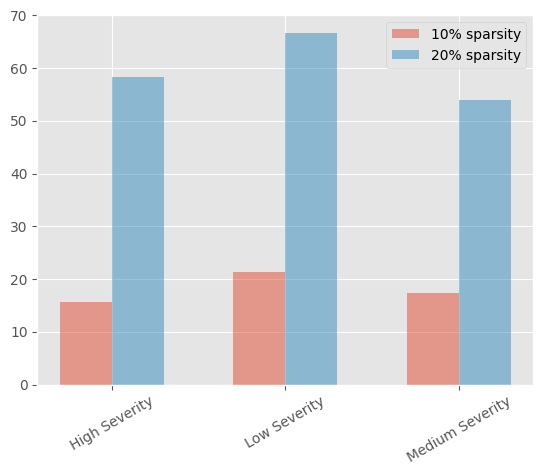

In [9]:
plt.style.use("ggplot")
plt.figure(figsize=(20,20));
fig, ax = plt.subplots();
width = 0.3
ax.bar([1.0, 2.0, 3.0], 
       [-np.mean(severity_data) for severity_data in all_by_severity_10['metric1'].values()], 
       width,
       alpha=0.5,
      label='10% sparsity');
ax.bar([1 + width, 2 + width, 3 + width], 
       [-np.mean(severity_data) for severity_data in all_by_severity_20['metric1'].values()],  
       width, 
       alpha=0.5, 
       label='20% sparsity');
ax.set_xticks([1 + width/2, 2 + width/2, 3 + width/2], all_by_severity_10['metric1'].keys())
ax.set_xticklabels(all_by_severity_10['metric1'].keys(), rotation=30);

plt.legend()
plt.savefig('intra_task_per_severity.pdf', format='pdf', bbox_inches='tight')

<Figure size 2000x2000 with 0 Axes>

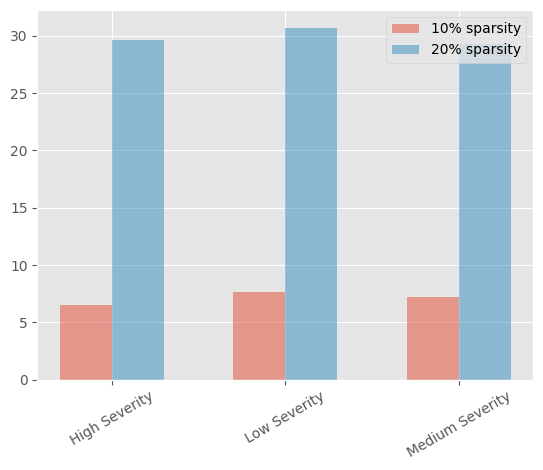

In [10]:
plt.style.use("ggplot")
plt.figure(figsize=(20,20));
fig, ax = plt.subplots();
width = 0.3
ax.bar([1.0, 2.0, 3.0], 
       [-np.mean(severity_data) for severity_data in all_by_severity_10['metric3'].values()], 
       width,
       alpha=0.5,
      label='10% sparsity');
ax.bar([1 + width, 2 + width, 3 + width], 
       [-np.mean(severity_data) for severity_data in all_by_severity_20['metric3'].values()],  
       width, 
       alpha=0.5, 
       label='20% sparsity');
ax.set_xticks([1 + width/2, 2 + width/2, 3 + width/2], all_by_severity_10['metric1'].keys())
ax.set_xticklabels(all_by_severity_10['metric1'].keys(), rotation=30);

plt.legend()
plt.savefig('end_task_per_severity.pdf', bbox_inches='tight', format='pdf')